## Test transfer learning 
#### follow tutorial
https://www.tensorflow.org/hub/tutorials/tf2_image_retraining
 

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow_hub as hub

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [158]:
file = '../data/home_sale_data_324.csv'

data = pd.read_csv(file)
labels = data['label']
data.drop(['label'], axis=1, inplace=True)
data

,OverallQual,GrLivArea,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,...,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3
0,0.666667,0.621404,0.4,0.415447,0.368280,0.926316,0.306690,0.392556,0.949275,0.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.555556,0.503789,0.4,0.224226,0.309140,0.642105,0.434147,0.552164,0.753623,0.50,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.666667,0.638314,0.4,0.415447,0.408602,0.910526,0.327145,0.422306,0.934783,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.622991,0.6,0.163947,0.431452,0.289474,0.274401,0.440273,0.311594,0.25,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.777778,0.719292,0.6,0.415447,0.561828,0.894737,0.397934,0.512289,0.927536,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,0.333333,0.448096,0.0,0.088791,0.000000,0.578947,0.205017,0.205975,0.710145,0.25,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2907,0.333333,0.448096,0.2,0.088791,0.192204,0.578947,0.205017,0.205975,0.710145,0.25,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2908,0.444444,0.492003,0.4,0.163947,0.387097,0.663158,0.422426,0.539643,0.637681,0.25,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2909,0.444444,0.402649,0.0,0.060279,0.000000,0.810526,0.324596,0.444112,0.869565,0.25,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [159]:
'''one-hot encode the labels'''

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
# print(list(integer_encoded))
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)
print(labels)




[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [160]:
'''test reshape'''
tmp = [[1,2,3,4], [5,6, 7,8], [9,10,11,12]]
tmp = np.array(tmp)
tmp.shape
tmp.reshape(3,2,2)


array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [161]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

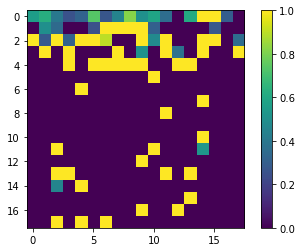

In [162]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18,18)
plt.imshow(a11)
plt.colorbar()
plt.show()

In [163]:
labels.shape

(2911, 4)

In [164]:
train_examples = data_np
train_examples.shape

(2911, 18, 18)

In [165]:
val_examples = train_examples[-291:]
train_examples = train_examples[:-291]
val_labels = labels[-291:]
train_labels = labels[:-291]

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [166]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(18, 18), dtype=tf.float64, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [167]:
train_examples.shape
val_examples.shape

(291, 18, 18)

In [168]:
trainX = train_examples.reshape(2620, 18,18,1)
trainY = train_labels

testX = val_examples.reshape(291, 18,18,1)
testY = val_labels


In [169]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [174]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 64
epochs = 25

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)

num_classes = 4

# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(1, 3, padding='same', activation='relu', input_shape=(18, 18, 1)),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


# '''anotehr ver'''

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(18, 18, 1)),
	tf.keras.layers.MaxPooling2D((2, 2)),
	tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  	tf.keras.layers.MaxPooling2D(),
  	tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(4, activation='softmax')
])

# opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [175]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 18, 18, 16)        160       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 9, 9, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 2, 2, 64)       

In [176]:
# train_examples.reshape(-1, 18,18,1)
history = model.fit(trainX, trainY, epochs=25,validation_data=(testX, testY), batch_size=64)


Epoch 1/25


2022-04-18 23:20:06.589883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 1s 16ms/step - loss: 1.3867 - accuracy: 0.2550 - val_loss: 1.3770 - val_accuracy: 0.2818
Epoch 2/25
 6/41 [===>..........................] - ETA: 0s - loss: 1.3901 - accuracy: 0.2552

2022-04-18 23:20:07.550189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 0s 11ms/step - loss: 1.3776 - accuracy: 0.3038 - val_loss: 1.3422 - val_accuracy: 0.4055
Epoch 3/25
41/41 [==============================] - 0s 11ms/step - loss: 1.3674 - accuracy: 0.3092 - val_loss: 1.3146 - val_accuracy: 0.4055
Epoch 4/25
41/41 [==============================] - 1s 13ms/step - loss: 1.3596 - accuracy: 0.3263 - val_loss: 1.2971 - val_accuracy: 0.4089
Epoch 5/25
41/41 [==============================] - 0s 11ms/step - loss: 1.3518 - accuracy: 0.3195 - val_loss: 1.3049 - val_accuracy: 0.3574
Epoch 6/25
41/41 [==============================] - 0s 11ms/step - loss: 1.3500 - accuracy: 0.3431 - val_loss: 1.3098 - val_accuracy: 0.3711
Epoch 7/25
41/41 [==============================] - 0s 11ms/step - loss: 1.3362 - accuracy: 0.3584 - val_loss: 1.3117 - val_accuracy: 0.4089
Epoch 8/25
41/41 [==============================] - 0s 11ms/step - loss: 1.3216 - accuracy: 0.3714 - val_loss: 1.3169 - val_accuracy: 0.3333
Epoch 9/25
41/41 [======

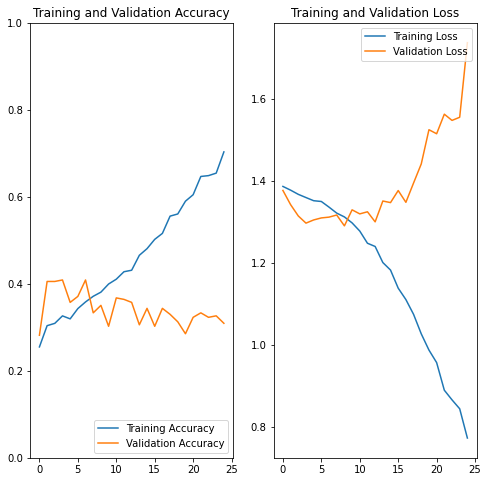

In [177]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [151]:
%reset -f

In [72]:
model.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.6444 - sparse_categorical_accuracy: 0.9575


[0.6444269418716431, 0.9575000405311584]

In [ ]:
# epochs = 25
# # history = model.fit(train_dataset, epochs=epochs, validation_data=(val_examples, val_labels))
# history = model.fit(train_dataset, epochs=epochs)
